In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib
import os
from sklearn.preprocessing import LabelEncoder


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import  Image
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import altair as alt

# Estandarizacion 
from sklearn.preprocessing import StandardScaler

# Modelos Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR


# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor,
                             GradientBoostingRegressor, ExtraTreesRegressor,
                             VotingRegressor)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
import funciones as func

In [3]:
import pandas as pd
# load dataset
datos = pd.read_csv('var_standar.csv')

In [4]:
df = datos.copy()

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)

In [6]:
X = df.drop(['prices'], axis=1)
y = df['prices'].copy()

In [7]:
X

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor
0,1,45,0,2,3,351,1,0,0
1,9,14,0,2,5,298,1,0,10
2,1,12,0,4,2,90,1,0,14
3,1,45,0,2,2,130,1,0,0
4,3,0,0,7,3,110,0,0,17
...,...,...,...,...,...,...,...,...,...
3260,2,61,1,2,1,64,1,0,0
3261,0,17,1,2,3,99,0,0,7
3262,4,50,1,2,4,127,1,0,11
3263,7,37,1,2,3,64,0,0,18


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [9]:
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [10]:
cv_metricas = pd.DataFrame
cv_residuo = pd.DataFrame
dic_residuos = {}
cv_metricas, cv_residuo, dic_residuos = func.modelos(X_train, X_test, y_train, y_test)

In [11]:
dic_residuos

{'Linear': array([ 3.63622251e+05,  1.03970747e+06,  1.08167969e+06,  6.56301975e+05,
         3.52005098e+05,  5.13828671e+05,  3.02659059e+05,  3.47973922e+05,
         4.08753526e+05,  7.62644805e+05, -1.07050778e+04,  2.95587411e+05,
         4.04414592e+05,  6.56601436e+05,  3.64758628e+05,  4.34775411e+05,
         3.36704115e+05,  1.32432755e+05,  3.80545005e+05,  6.16886753e+05,
         5.15827632e+05,  4.82155913e+05,  4.63128191e+05,  2.99126655e+06,
         3.50514341e+05,  6.77524501e+05,  4.25476714e+05,  5.84170563e+05,
         1.13084184e+06,  1.91411941e+06,  4.28422804e+05,  3.43753926e+05,
         9.74133299e+04,  1.82359048e+06,  7.03215829e+05,  5.87478457e+05,
         1.69133491e+05,  3.26180579e+05,  5.51150497e+05,  2.79502952e+05,
         7.47172594e+05,  6.00169357e+05,  3.01460909e+05,  2.63936063e+05,
         4.86754410e+05,  3.94522061e+05,  2.22771078e+05,  4.01245370e+05,
         6.15021365e+05,  1.32021185e+06,  1.43349812e+06,  3.54041643e+05,
  

In [12]:
cv_metricas

,CrossValMeans,CrossValErrors,Modelos
0,176645.243346,373404.794973,Linear
1,160401.289433,435680.225107,DecisionTree
2,133263.356589,331496.525497,RandomForest
3,174000.099541,363691.852688,KNeighbors
4,348569.877489,586666.972119,GaussianNB
5,346917.133780,758560.467004,SVR
6,305953.970450,608809.797670,GradientBoosting


In [13]:
cv_residuo

,Modelos,rmse
0,Linear,1.153493e+08
1,DecisionTree,1.047420e+08
2,RandomForest,8.702097e+07
3,KNeighbors,1.136221e+08
4,GaussianNB,2.276161e+08
5,SVR,2.265369e+08
6,GradientBoosting,1.997879e+08


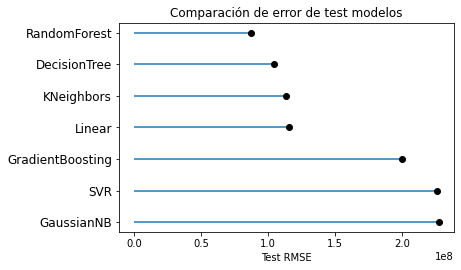

In [14]:
func.pintarResiduos(cv_residuo)

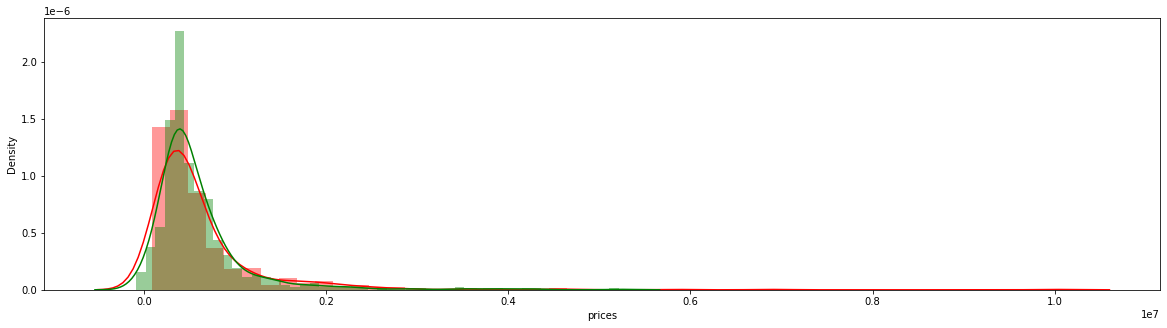

In [15]:
func.pintarPrediccion(dic_residuos,y_test, 'Linear')

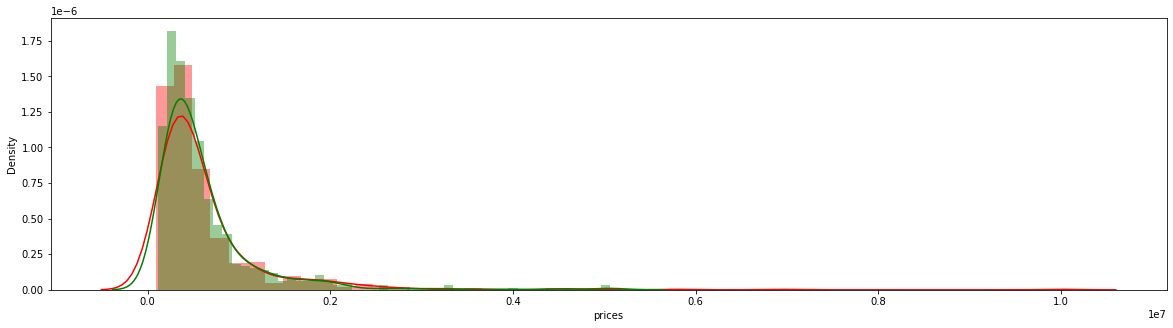

In [16]:
func.pintarPrediccion(dic_residuos,y_test, 'RandomForest')
# 'Linear', 'DecisionTree', 'RandomForest', 'KNeighbors',
#                                         'GaussianNB', 'SVR', 'GradientBoosting'

In [17]:
from sklearn.model_selection import GridSearchCV

parametros={ 'criterion' : ['squared_error', 'absolute_error', 'poisson'],
            'n_estimators': ( 10,20,30,50,70,100),
            'max_samples': (1/3,2/3)}


In [18]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [19]:
grid=GridSearchCV(RandomForestRegressor(),
param_grid=parametros,
scoring='neg_root_mean_squared_error',
n_jobs=-1)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_samples': (0.3333333333333333,
                                         0.6666666666666666),
                         'n_estimators': (10, 20, 30, 50, 70, 100)},
             scoring='neg_root_mean_squared_error')

In [40]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error',
                      max_samples=0.6666666666666666, n_estimators=10)

In [41]:
grid.best_score_

-326867.6914135551

In [23]:
grid.best_score_

-325188.0877842065

In [38]:
cv_metricas.sort_values(by='CrossValErrors')

,CrossValMeans,CrossValErrors,Modelos
2,133263.356589,331496.525497,RandomForest
3,174000.099541,363691.852688,KNeighbors
0,176645.243346,373404.794973,Linear
1,160401.289433,435680.225107,DecisionTree
4,348569.877489,586666.972119,GaussianNB
6,305953.970450,608809.797670,GradientBoosting
5,346917.133780,758560.467004,SVR


In [24]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,0.488692,0.105946,0.016556,0.002411,poisson,0.333333,70,"{'criterion': 'poisson', 'max_samples': 0.3333...",-475712.289411,-296196.287936,-305307.781683,-236692.965302,-312031.114589,-325188.087784,79872.121483,1
17,5.114921,0.796025,0.037899,0.017469,absolute_error,0.333333,100,"{'criterion': 'absolute_error', 'max_samples':...",-467853.900981,-293340.234861,-308171.642279,-239894.456561,-324682.762650,-326788.599466,76052.389970,2
23,6.232732,0.294209,0.021941,0.001410,absolute_error,0.666667,100,"{'criterion': 'absolute_error', 'max_samples':...",-474951.457830,-288250.117630,-306451.934796,-237003.928440,-327445.665837,-326820.620907,79890.851630,3
22,4.413996,0.080570,0.021941,0.011985,absolute_error,0.666667,70,"{'criterion': 'absolute_error', 'max_samples':...",-466136.469718,-287204.222761,-305171.348785,-242966.383749,-339841.732104,-328264.031424,75680.540395,4
16,3.343659,0.384406,0.033111,0.015105,absolute_error,0.333333,70,"{'criterion': 'absolute_error', 'max_samples':...",-472019.131788,-309702.058224,-294751.396422,-250388.609969,-327200.043857,-330812.248052,75055.204658,5


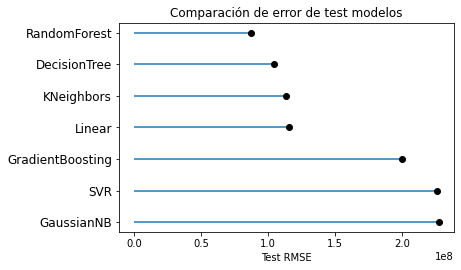

In [25]:
func.pintarResiduos(cv_residuo)

In [26]:
prueb = df.copy()

In [27]:
variable = prueb.corr().prices.sort_values().index.tolist()

In [28]:
variable.insert(0,variable.pop())
variable

['prices',
 'neighborhood',
 'condition',
 'views',
 'lift',
 'type',
 'district',
 'floor',
 'rooms',
 'area_m2']

In [29]:
variable[0:1]

['prices']

In [30]:
ola = func.valores(df,variable)

In [31]:
cv_residuo

,Modelos,rmse
0,Linear,1.153493e+08
1,DecisionTree,1.047420e+08
2,RandomForest,8.702097e+07
3,KNeighbors,1.136221e+08
4,GaussianNB,2.276161e+08
5,SVR,2.265369e+08
6,GradientBoosting,1.997879e+08


In [32]:
cv_residuo.sort_values(by='rmse').head(1)

,Modelos,rmse
2,RandomForest,8.702097e+07


In [33]:
ola

{1:         Modelos          rmse
 2  RandomForest  8.671825e+07,
 2:         Modelos          rmse
 2  RandomForest  9.276865e+07,
 3:         Modelos          rmse
 2  RandomForest  9.974335e+07,
 4:         Modelos          rmse
 2  RandomForest  1.018934e+08,
 5:         Modelos          rmse
 2  RandomForest  1.036805e+08,
 6:         Modelos          rmse
 2  RandomForest  1.050179e+08,
 7:         Modelos          rmse
 2  RandomForest  1.119979e+08,
 8:   Modelos          rmse
 0  Linear  1.130514e+08,
 9:   Modelos          rmse
 0  Linear  1.207342e+08}

In [34]:
# def valores (df, valores):
#     dic_varibles={}
#     for i in range(1,len(valores),1):
        
#         X = df.drop(valores[0:i], axis=1)
#         y = df['prices'].copy()

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#         escalar = StandardScaler()
#         X_train = escalar.fit_transform(X_train)
#         X_test = escalar.transform(X_test)
        
#         cv_metricas = pd.DataFrame
#         cv_residuo = pd.DataFrame
#         dic_residuos = {}
#         cv_metricas, cv_residuo, dic_residuos = func.modelos(X_train, X_test, y_train, y_test)
#         dic_varibles[i] = cv_residuo.min()
        

In [35]:
cv_residuo

,Modelos,rmse
0,Linear,1.153493e+08
1,DecisionTree,1.047420e+08
2,RandomForest,8.702097e+07
3,KNeighbors,1.136221e+08
4,GaussianNB,2.276161e+08
5,SVR,2.265369e+08
6,GradientBoosting,1.997879e+08
